First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

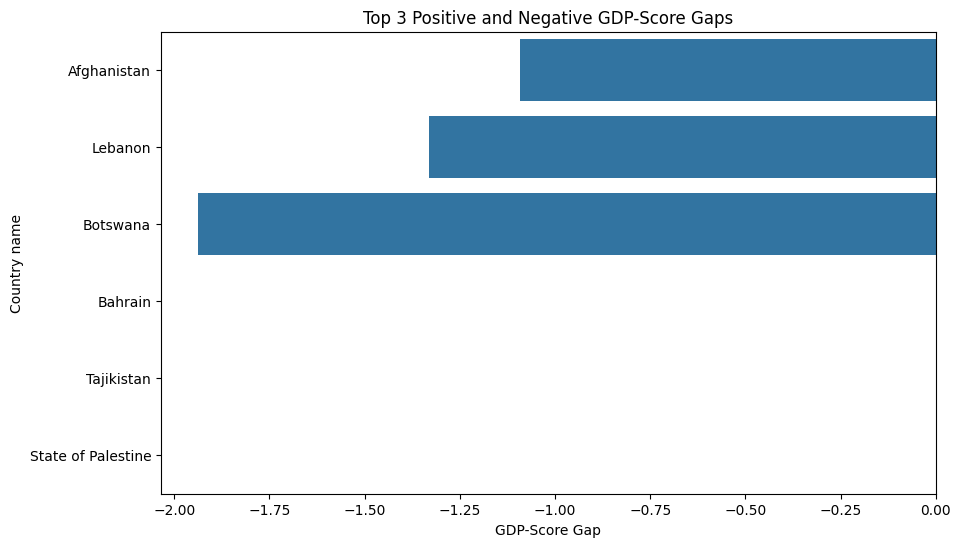


South Asia - Mean Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Score: 5.28, Standard Deviation: 1.55


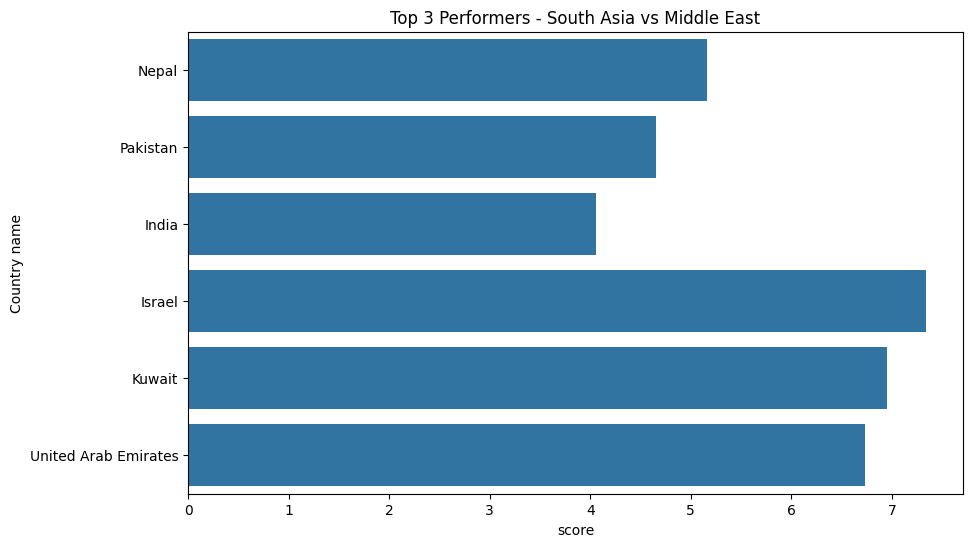

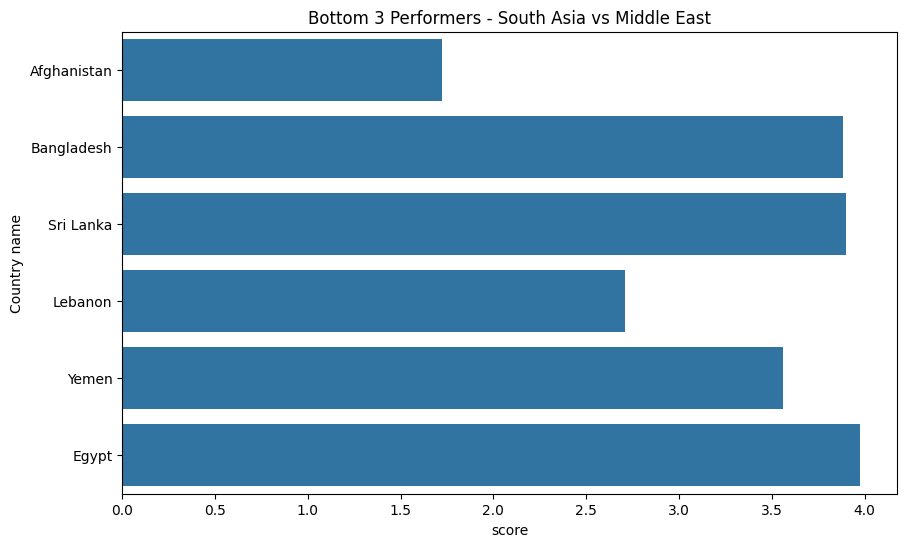

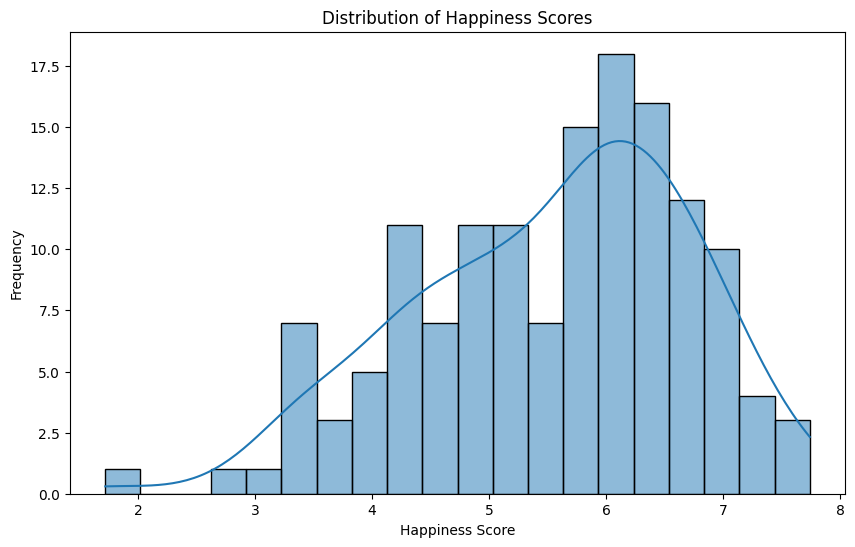

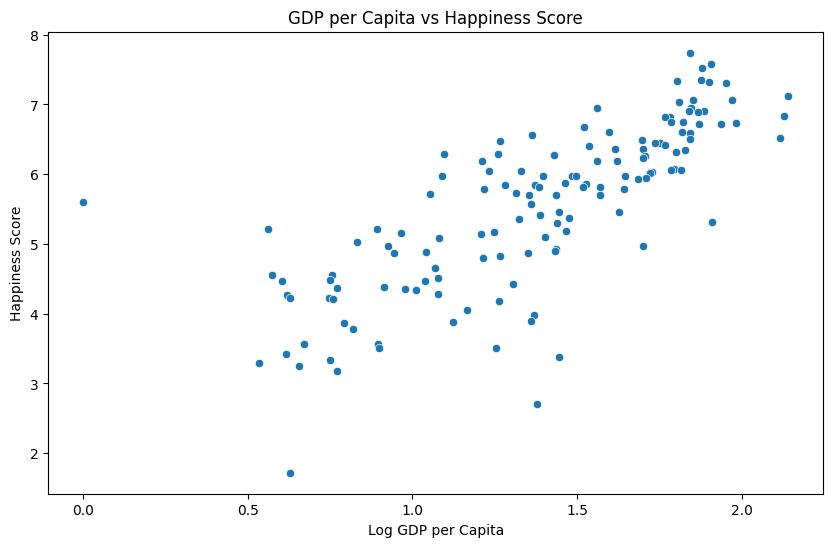

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('WHR-2024-5CS037.csv')

# Displaying the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# to get the number of rows and columns
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

# List all columns and their data types
print("\nColumn names and data types:")
print(df.dtypes)

# Task 1: Basic statistics and extreme values for 'score'
print("\nBasic statistics for the 'score' column:")
print(df['score'].describe())

# Highest and lowest happiness scores
highest_score_country = df[df['score'] == df['score'].max()]['Country name'].iloc[0]
lowest_score_country = df[df['score'] == df['score'].min()]['Country name'].iloc[0]

print(f"\nCountry with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Task 2: Filter countries with Score > 7.5 and sort by 'Log GDP per capita'
high_score_df = df[df['score'] > 7.5].sort_values(by='Log GDP per capita', ascending=False)
print("\nCountries with a happiness score > 7.5:")
print(high_score_df[['Country name', 'score', 'Log GDP per capita']])

# Task 3: Categorize happiness levels into 'Low', 'Medium', and 'High'
df['Happiness Category'] = pd.cut(df['score'], bins=[-float('inf'), 4, 6, float('inf')],
                                  labels=['Low', 'Medium', 'High'])
print("\nCountries with their respective happiness categories:")
print(df[['Country name', 'score', 'Happiness Category']])

# Task 4: Filter South Asian countries and save to CSV
south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
south_asia_df = df[df['Country name'].isin(south_asia)]
south_asia_df.to_csv("south_asia_happiness.csv", index=False)

print("\nSouth Asian countries' happiness data:")
print(south_asia_df)

# Task 5: GDP-Score Gap Calculation
df['GDP-Score Gap'] = df['Log GDP per capita'] - df['score']
df_sorted_gap = df.sort_values(by='GDP-Score Gap', ascending=False)

# Top 3 positive and negative GDP-Score Gaps
top_positive_gap = df_sorted_gap.head(3)
top_negative_gap = df_sorted_gap.tail(3)

# Visualization for GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name',
            data=pd.concat([top_positive_gap, top_negative_gap]))
plt.title("Top 3 Positive and Negative GDP-Score Gaps")
plt.show()

# Task 6: Compare South Asia and Middle East
middle_east = ['Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
               'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen']

middle_east_df = df[df['Country name'].isin(middle_east)]

# Descriptive statistics
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"\nSouth Asia - Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Top and Bottom Performers in Each Region
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')

top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

# Visualization for Top Performers
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, top_3_me]))
plt.title("Top 3 Performers - South Asia vs Middle East")
plt.show()

# Visualization for Bottom Performers
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=pd.concat([bottom_3_sa, bottom_3_me]))
plt.title("Bottom 3 Performers - South Asia vs Middle East")
plt.show()

# Task 7: General Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=20)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for GDP per capita vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()


KeyError: 'Country'